In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px

mpl.rc('font', family='Malgun Gothic')

In [3]:
dfs = pd.read_excel('서울시 인구이동과 주택가격 종합 지표.xlsx')

In [5]:
dfc = pd.read_excel('창원시 인구이동과 주택가격 종합 지표.xlsx')

In [13]:
dfc

,행정구역(동읍면)별,시점,5세별,총인구수 (명),연령별 전월 대비 증감,증감률,매매가격지수 원데이터 주택종합,매매가격지수 전월 대비 증감 주택종합,매매가격지수 증감률 주택종합,(아파트 매매가격지수)원데이터,...,아파트 전세가격지수 증감률,주택 거래 현황 원데이터 (소계),주택 거래 현황 전월 대비 증감 (소계),주택 거래 현황 증감률 (소계),주택 거래 현황 원데이터 (아파트),주택 거래 현황 전월 대비 증감 (아파트),주택 거래 현황 증감률 (아파트),미분양 주택 현황 원데이터,미분양 주택 현황 전월 대비 증감,미분양 주택 현황 증감률
0,창원시,2019-01-01,계,1053290,-311,0.0,95.1,-0.3,-0.3,91.9,...,-0.1,1232,-37,-2.9,1049,-9,-0.9,6736,-18,-0.3
1,창원시,2019-01-01,0 - 4세,41395,-307,-0.7,95.1,-0.3,-0.3,91.9,...,-0.1,1232,-37,-2.9,1049,-9,-0.9,6736,-18,-0.3
2,창원시,2019-01-01,5 - 9세,49778,-65,-0.1,95.1,-0.3,-0.3,91.9,...,-0.1,1232,-37,-2.9,1049,-9,-0.9,6736,-18,-0.3
3,창원시,2019-01-01,10 - 14세,48776,60,0.1,95.1,-0.3,-0.3,91.9,...,-0.1,1232,-37,-2.9,1049,-9,-0.9,6736,-18,-0.3
4,창원시,2019-01-01,15 - 19세,59256,-406,-0.7,95.1,-0.3,-0.3,91.9,...,-0.1,1232,-37,-2.9,1049,-9,-0.9,6736,-18,-0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,창원시,2023-12-01,80 - 84세,20478,-51,-0.2,98.9,0.0,0.0,98.5,...,0.2,969,-253,-20.7,782,-251,-24.3,359,-3,-0.8
1316,창원시,2023-12-01,85 - 89세,10675,95,0.9,98.9,0.0,0.0,98.5,...,0.2,969,-253,-20.7,782,-251,-24.3,359,-3,-0.8
1317,창원시,2023-12-01,90 - 94세,3588,58,1.6,98.9,0.0,0.0,98.5,...,0.2,969,-253,-20.7,782,-251,-24.3,359,-3,-0.8
1318,창원시,2023-12-01,95 - 99세,675,13,2.0,98.9,0.0,0.0,98.5,...,0.2,969,-253,-20.7,782,-251,-24.3,359,-3,-0.8


In [52]:
dfs.columns

Index(['행정구역(동읍면)별', '시점', '5세별', '인구수', '인구수 전월 대비 증감', '인구수 증감률',
       '매매가격지수 원데이터 (주택종합)', '매매 가격 지수 전월 대비 증감 (주택 종합)', '매매가격지수 증감률 (주택 종합)',
       '매매가격지수 원데이터 (아파트)', '매매가격지수 전월 대비 증감 (아파트)', '매매가격지수 증감률 (아파트)',
       '전세가격지수 원데이터 (종합)', '전세 가격 지수 전월 대비 증감 (종합)', '전세가격지수 증감률 (종합)',
       '전세가격지수 원데이터 (아파트)', '전세가격지수 전월 대비 증감 (아파트)', '전세가격지수 증감률 (아파트)',
       '주택 거래량 원데이터 (종합)', '주택 거래량 전월 대비 증감 (종합)', '주택 거래량 증감률 (종합)',
       '주택 거래량 원데이터 (아파트)', '주택 거래량 전월 대비 증감 (아파트)', '주택 거래량 증감률 (아파트)',
       '미분양 현황 원데이터', '미분양 현황 전월 대비 증감', '미분양 현황 증감률'],
      dtype='object')

In [46]:
dfc.columns

Index(['행정구역(동읍면)별', '시점', '5세별', '총인구수 (명)', '연령별 전월 대비 증감', '증감률',
       '매매가격지수 원데이터 주택종합', '매매가격지수 전월 대비 증감 주택종합', '매매가격지수 증감률 주택종합',
       '(아파트 매매가격지수)원데이터', '(아파트 매매가격지수)전월 대비 증감', '(아파트 매매가격지수)증감률',
       '전세가격지수 원데이터 주택종합', '전세가격지수 전월 대비 증감 주택종합', '전세가격지수 증감률 주택종합',
       '아파트 전세가격지수 원데이터', '아파트 전세가격지수 전월 대비 증감', '아파트 전세가격지수 증감률',
       '주택 거래 현황 원데이터 (소계)', '주택 거래 현황 전월 대비 증감 (소계)', '주택 거래 현황 증감률 (소계)',
       '주택 거래 현황 원데이터 (아파트)', '주택 거래 현황 전월 대비 증감 (아파트)', '주택 거래 현황 증감률 (아파트)',
       '미분양 주택 현황 원데이터', '미분양 주택 현황 전월 대비 증감', '미분양 주택 현황 증감률'],
      dtype='object')

In [8]:
#데이터의 구조와 타입 확인
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   행정구역(동읍면)별                 1320 non-null   object        
 1   시점                         1320 non-null   datetime64[ns]
 2   5세별                        1320 non-null   object        
 3   원데이터                       1320 non-null   int64         
 4   전월 대비 증감                   1320 non-null   int64         
 5   증감률                        1320 non-null   float64       
 6   매매가격지수 원데이터 (주택종합)         1320 non-null   float64       
 7   매매 가격 지수 전월 대비 증감 (주택 종합)  1320 non-null   float64       
 8   매매가격지수 증감률 (주택 종합)         1320 non-null   float64       
 9   매매가격지수 원데이터 (아파트)          1320 non-null   float64       
 10  매매가격지수 전월 대비 증감 (아파트)      1320 non-null   float64       
 11  매매가격지수 증감률 (아파트)           1320 non-null   float64       
 12  전세가격지수

In [10]:
# 기술통계량 확인 (서울시)
dfs.describe()

,시점,원데이터,전월 대비 증감,증감률,매매가격지수 원데이터 (주택종합),매매 가격 지수 전월 대비 증감 (주택 종합),매매가격지수 증감률 (주택 종합),매매가격지수 원데이터 (아파트),매매가격지수 전월 대비 증감 (아파트),매매가격지수 증감률 (아파트),...,전세가격지수 증감률 (아파트),주택 거래량 원데이터 (종합),주택 거래량 전월 대비 증감 (종합),주택 거래량 증감률 (종합),주택 거래량 원데이터 (아파트),주택 거래량 전월 대비 증감 (아파트),주택 거래량 증감률 (아파트),미분양 현황 원데이터,미분양 현황 전월 대비 증감,미분양 현황 증감률
count,1320,1.320000e+03,1320.000000,1320.000000,1320.000000,1320.00000,1320.000000,1320.000000,1320.000000,1320.000000,...,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,2021-06-16 06:24:00,8.713753e+05,-575.134848,-0.075379,97.770000,0.05000,0.058333,96.773333,0.018333,0.023333,...,-0.106667,14920.433333,-73.766667,2.270000,8587.233333,-9.750000,5.041667,401.816667,15.516667,31.825000
min,2019-01-01 00:00:00,1.292000e+03,-50122.000000,-60.300000,92.700000,-2.00000,-2.000000,91.100000,-2.900000,-3.000000,...,-4.800000,4982.000000,-15122.000000,-40.600000,1773.000000,-11761.000000,-52.800000,27.000000,-1015.000000,-62.100000
25%,2020-03-24 06:00:00,2.555770e+05,-1603.000000,-0.300000,95.275000,-0.10000,-0.100000,92.975000,-0.200000,-0.200000,...,-0.100000,9527.750000,-1781.750000,-13.225000,4789.000000,-1003.000000,-15.825000,57.500000,-15.250000,-8.675000
50%,2021-06-16 00:00:00,4.711145e+05,-27.000000,0.000000,96.700000,0.10000,0.100000,94.950000,0.100000,0.100000,...,0.200000,13174.500000,-474.500000,-3.250000,7139.000000,-1.500000,1.050000,163.500000,-2.000000,-2.900000
75%,2022-09-08 12:00:00,7.313285e+05,756.000000,0.300000,100.775000,0.32500,0.400000,100.950000,0.425000,0.500000,...,0.600000,19760.750000,1207.500000,12.000000,11782.000000,1135.250000,19.575000,793.750000,25.000000,4.500000
max,2023-12-01 00:00:00,9.770638e+06,8195.000000,3.000000,103.700000,0.80000,0.900000,104.400000,1.100000,1.200000,...,1.000000,37221.000000,11678.000000,95.900000,24038.000000,8277.000000,126.600000,2099.000000,1103.000000,1440.000000
std,NaN,1.921759e+06,2756.269342,2.027930,3.607903,0.50665,0.505263,4.504256,0.712658,0.732481,...,1.164610,6718.915707,3982.268001,26.140475,4722.258458,3141.940746,34.920126,448.100509,233.361748,189.479551


In [14]:
# 기술통계량 확인 (창원시)
dfc.describe()

,시점,총인구수 (명),연령별 전월 대비 증감,증감률,매매가격지수 원데이터 주택종합,매매가격지수 전월 대비 증감 주택종합,매매가격지수 증감률 주택종합,(아파트 매매가격지수)원데이터,(아파트 매매가격지수)전월 대비 증감,(아파트 매매가격지수)증감률,...,아파트 전세가격지수 증감률,주택 거래 현황 원데이터 (소계),주택 거래 현황 전월 대비 증감 (소계),주택 거래 현황 증감률 (소계),주택 거래 현황 원데이터 (아파트),주택 거래 현황 전월 대비 증감 (아파트),주택 거래 현황 증감률 (아파트),미분양 주택 현황 원데이터,미분양 주택 현황 전월 대비 증감,미분양 주택 현황 증감률
count,1320,1.320000e+03,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,...,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,2021-06-16 06:24:00,9.388177e+04,-67.519697,-0.002652,98.581894,0.055076,0.070000,97.708712,0.106667,0.113409,...,0.128333,2172.512121,-4.774242,8.500303,1901.203030,-4.373485,10.497879,2356.500758,-106.456818,2.210682
min,2019-01-01 00:00:00,6.300000e+01,-1894.000000,-37.300000,91.300000,-3.100000,-2.900000,87.400000,-4.100000,-3.900000,...,-2.700000,864.000000,-3206.000000,-66.000000,700.000000,-3262.000000,-69.500000,141.000000,-1149.000000,-50.700000
25%,2020-03-24 06:00:00,2.592175e+04,-236.000000,-0.300000,93.575000,-0.300000,-0.300000,90.500000,-0.300000,-0.325000,...,-0.300000,1338.500000,-323.250000,-21.025000,1167.750000,-337.500000,-23.325000,400.000000,-137.000000,-10.125000
50%,2021-06-16 00:00:00,5.247950e+04,-2.000000,0.000000,98.550000,0.100000,0.150000,98.000000,0.200000,0.200000,...,0.100000,1834.000000,-7.500000,-0.500000,1583.500000,-2.000000,-0.150000,682.500000,-18.000000,-1.900000
75%,2022-09-08 12:00:00,7.983650e+04,81.000000,0.400000,101.600000,0.425000,0.425000,102.150000,0.600000,0.525000,...,0.600000,2666.250000,481.750000,28.150000,2353.000000,468.000000,32.175000,5108.000000,-4.000000,-0.300000
max,2023-12-01 00:00:00,1.053290e+06,961.000000,8.800000,108.600000,2.900000,3.000000,111.300000,4.200000,4.500000,...,3.300000,4868.000000,3515.000000,262.500000,4694.000000,3474.000000,284.800000,6773.000000,586.000000,415.600000
std,NaN,2.070862e+05,290.220574,1.582438,5.457380,0.840063,0.826005,7.583380,1.134283,1.132628,...,0.896831,1002.406026,1060.516162,50.028377,937.598363,1029.519882,56.347310,2438.213667,282.775821,59.938379


In [37]:
# 서울시 일부 변수명 조정
dfs = dfs.rename(columns={'원데이터': '인구수', '전월 대비 증감': '인구수 전월 대비 증감', '증감률': '인구수 증감률'})

In [31]:
dfc = dfc.drop(columns=['Datetime'])

In [32]:
dfs = dfs.drop(columns=['Datetime'])

In [39]:
# EDA 시각화 작업 (서울시 시점별 인구수 변화)
px.line(dfs, x='시점', y='인구수', color='5세별')

In [45]:
# 창원시 시점별 인구수 변화
px.line(dfc, x='시점', y='총인구수 (명)', color='5세별')

In [48]:
# 서울시 시점별 아파트 매매가격지수 변화
px.line(dfs, x='시점', y='매매가격지수 원데이터 (아파트)', color= '5세별')

In [51]:
# 창원시 시점별 아파트 매매가격지수 변화 
px.line(dfc, x='시점', y='(아파트 매매가격지수)원데이터', color= '5세별')

In [53]:
# 서울시 인구수와 아파트 매매가격지수 상관성 확인 분석(산점도 그래프)
px.scatter(dfs, x='인구수', y='매매가격지수 원데이터 (아파트)', color='5세별')

In [54]:
# 창원시 인구수와 아파트 매매가격지수 상관성 확인 분석(산점도 그래프)
px.scatter(dfc, x='총인구수 (명)', y='(아파트 매매가격지수)원데이터', color='5세별')

In [55]:
import statsmodels.api as sm

In [67]:
# 서울 종합 차트에서 연령별 구분 열에서 합계 수치의 데이터만 추출하기 (데이터 전처리)
dfs_sum = dfs[dfs['5세별'] == '계']
dfs_sum

,행정구역(동읍면)별,시점,5세별,인구수,인구수 전월 대비 증감,인구수 증감률,매매가격지수 원데이터 (주택종합),매매 가격 지수 전월 대비 증감 (주택 종합),매매가격지수 증감률 (주택 종합),매매가격지수 원데이터 (아파트),...,전세가격지수 증감률 (아파트),주택 거래량 원데이터 (종합),주택 거래량 전월 대비 증감 (종합),주택 거래량 증감률 (종합),주택 거래량 원데이터 (아파트),주택 거래량 전월 대비 증감 (아파트),주택 거래량 증감률 (아파트),미분양 현황 원데이터,미분양 현황 전월 대비 증감,미분양 현황 증감률
0,서울특별시,2019-01-01,계,9766288,665,0.0,93.4,-0.2,-0.2,92.4,...,-0.5,13452,-151,-1.1,7000,410,6.2,27,0,0.0
22,서울특별시,2019-02-01,계,9770638,4350,0.0,93.2,-0.2,-0.2,92.1,...,-0.7,9027,-4425,-32.9,4625,-2375,-33.9,50,23,85.2
44,서울특별시,2019-03-01,계,9770216,-422,0.0,93.0,-0.2,-0.2,91.7,...,-0.6,12206,3179,35.2,6464,1839,39.8,770,720,1440.0
66,서울특별시,2019-04-01,계,9766886,-3330,0.0,92.9,-0.2,-0.2,91.4,...,-0.3,12897,691,5.7,6275,-189,-2.9,292,-478,-62.1
88,서울특별시,2019-05-01,계,9762062,-4824,0.0,92.8,-0.1,-0.1,91.2,...,-0.1,13581,684,5.3,7278,1003,16.0,178,-114,-39.0
110,서울특별시,2019-06-01,계,9757144,-4918,-0.1,92.7,0.0,0.0,91.1,...,-0.1,17434,3853,28.4,11205,3927,54.0,123,-55,-30.9
132,서울특별시,2019-07-01,계,9751415,-5729,-0.1,92.8,0.1,0.1,91.2,...,0.0,20486,3052,17.5,13597,2392,21.3,190,67,54.5
154,서울특별시,2019-08-01,계,9744888,-6527,-0.1,92.9,0.1,0.1,91.3,...,0.1,20565,79,0.4,13960,363,2.7,205,15,7.9
176,서울특별시,2019-09-01,계,9740398,-4490,0.0,93.1,0.2,0.2,91.5,...,0.2,17419,-3146,-15.3,11483,-2477,-17.7,207,2,1.0
198,서울특별시,2019-10-01,계,9736289,-4109,0.0,93.5,0.4,0.4,92.0,...,0.4,21670,4251,24.4,14393,2910,25.3,191,-16,-7.7


In [68]:
# 서울시 관련 회귀분석 모델링 
X = dfs_sum['인구수']
Y = dfs_sum['매매가격지수 원데이터 (아파트)']

In [69]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

In [71]:
predictions = model.predict(X)

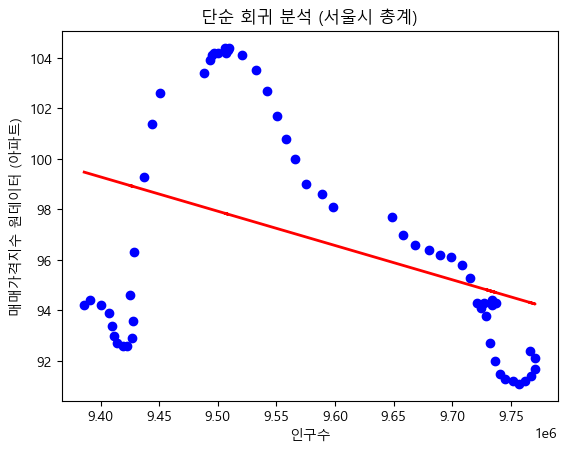

In [73]:
# 회귀직선 시각화
plt.scatter(dfs_sum['인구수'], dfs_sum['매매가격지수 원데이터 (아파트)'], color='blue')
plt.plot(dfs_sum['인구수'], predictions, color='red', linewidth=2)
plt.xlabel('인구수')
plt.ylabel('매매가격지수 원데이터 (아파트)')
plt.title('단순 회귀 분석 (서울시 총계)')
plt.show()

In [74]:
# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      매매가격지수 원데이터 (아파트)   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     11.19
Date:                Tue, 04 Jun 2024   Prob (F-statistic):            0.00145
Time:                        07:43:00   Log-Likelihood:                -170.12
No. Observations:                  60   AIC:                             344.2
Df Residuals:                      58   BIC:                             348.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        226.8515     38.887      5.834      0.0

In [84]:
# 회귀 결과를 문자열로 변환
summary_str = model.summary().as_text()

In [85]:
# 회귀분석 결과를 png 파일로 저장 
plt.figure(figsize=(12, 8))
plt.text(0.01, 0.05, summary_str, {'fontsize': 10}, fontproperties = 'monospace') 
plt.axis('off')
plt.tight_layout()

plt.savefig('regression_seoul_summary.png', dpi=300)
plt.close()

C:\Users\a0108\AppData\Local\Temp\ipykernel_24260\956017089.py:4: UserWarning:

Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.

C:\Users\a0108\AppData\Local\Temp\ipykernel_24260\956017089.py:4: UserWarning:

Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.

C:\Users\a0108\AppData\Local\Temp\ipykernel_24260\956017089.py:4: UserWarning:

Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.

C:\Users\a0108\AppData\Local\Temp\ipykernel_24260\956017089.py:4: UserWarning:

Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.

C:\Users\a0108\AppData\Local\Temp\ipykernel_24260\956017089.py:4: UserWarning:

Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.

C:\Users\a0108\AppData\Local\Temp\ipykernel_24260\956017089.py:4: UserWarning:

Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.

C:\Users\a0108\AppData\Local\Temp\ipykernel_24260\956017089.py:4: UserWarning:

Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing

In [75]:
# 창원시 종합 차트에서 연령별 구분 열에서 합계 수치의 데이터만 추출하기 (데이터 전처리)
dfc_sum = dfc[dfc['5세별'] == '계']
dfc_sum

,행정구역(동읍면)별,시점,5세별,총인구수 (명),연령별 전월 대비 증감,증감률,매매가격지수 원데이터 주택종합,매매가격지수 전월 대비 증감 주택종합,매매가격지수 증감률 주택종합,(아파트 매매가격지수)원데이터,...,아파트 전세가격지수 증감률,주택 거래 현황 원데이터 (소계),주택 거래 현황 전월 대비 증감 (소계),주택 거래 현황 증감률 (소계),주택 거래 현황 원데이터 (아파트),주택 거래 현황 전월 대비 증감 (아파트),주택 거래 현황 증감률 (아파트),미분양 주택 현황 원데이터,미분양 주택 현황 전월 대비 증감,미분양 주택 현황 증감률
0,창원시,2019-01-01,계,1053290,-311,0.0,95.1,-0.3,-0.3,91.9,...,-0.1,1232,-37,-2.9,1049,-9,-0.9,6736,-18,-0.3
22,창원시,2019-02-01,계,1052458,-832,-0.1,94.8,-0.3,-0.3,91.5,...,-0.3,1663,431,35.0,1501,452,43.1,6773,37,0.5
44,창원시,2019-03-01,계,1051118,-1340,-0.1,94.4,-0.4,-0.4,91.1,...,-0.2,1576,-87,-5.2,1372,-129,-8.6,6750,-23,-0.3
66,창원시,2019-04-01,계,1049897,-1221,-0.1,94.0,-0.4,-0.4,90.6,...,-0.3,1424,-152,-9.6,1220,-152,-11.1,5892,-858,-12.7
88,창원시,2019-05-01,계,1049052,-845,-0.1,93.5,-0.5,-0.5,90.0,...,-0.5,1214,-210,-14.7,1050,-170,-13.9,5892,0,0.0
110,창원시,2019-06-01,계,1048279,-773,-0.1,93.1,-0.4,-0.4,89.6,...,-0.5,1265,51,4.2,1064,14,1.3,5891,-1,0.0
132,창원시,2019-07-01,계,1047856,-423,0.0,92.5,-0.6,-0.6,88.8,...,-0.7,1966,701,55.4,1763,699,65.7,5889,-2,0.0
154,창원시,2019-08-01,계,1047210,-646,-0.1,92.0,-0.5,-0.6,88.2,...,-0.7,2387,421,21.4,2200,437,24.8,5875,-14,-0.2
176,창원시,2019-09-01,계,1046599,-611,-0.1,91.6,-0.4,-0.5,87.6,...,-0.5,1546,-841,-35.2,1407,-793,-36.0,5875,0,0.0
198,창원시,2019-10-01,계,1046054,-545,-0.1,91.4,-0.2,-0.2,87.4,...,-0.3,2196,650,42.0,2006,599,42.6,5865,-10,-0.2


In [78]:
# 창원시 관련 회귀분석 모델링 
X1 = dfc_sum['총인구수 (명)']
Y1 = dfc_sum['(아파트 매매가격지수)원데이터']

In [80]:
X1 = sm.add_constant(X1)
model2 = sm.OLS(Y1, X1).fit()

In [81]:
predictions2 = model2.predict(X1)

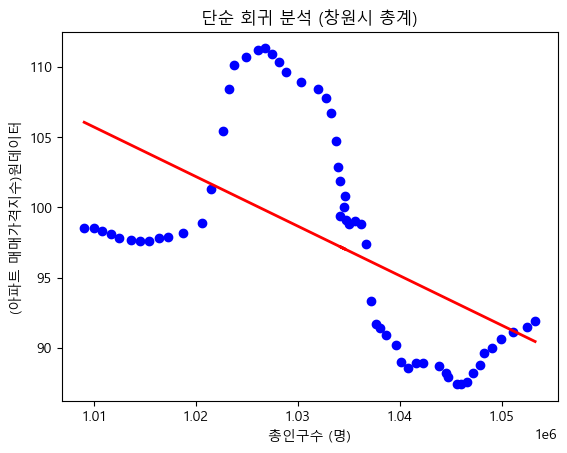

In [82]:
plt.scatter(dfc_sum['총인구수 (명)'], dfc_sum['(아파트 매매가격지수)원데이터'], color='blue')
plt.plot(dfc_sum['총인구수 (명)'], predictions2, color='red', linewidth=2)
plt.xlabel('총인구수 (명)')
plt.ylabel('(아파트 매매가격지수)원데이터')
plt.title('단순 회귀 분석 (창원시 총계)')
plt.show()

In [83]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:       (아파트 매매가격지수)원데이터   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     26.52
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           3.26e-06
Time:                        08:02:02   Log-Likelihood:                -195.38
No. Observations:                  60   AIC:                             394.8
Df Residuals:                      58   BIC:                             398.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        461.6529     70.675      6.532      0.0

In [86]:
summary_str = model2.summary().as_text()

In [87]:
plt.figure(figsize=(12, 8))
plt.text(0.01, 0.05, summary_str, {'fontsize': 10}, fontproperties = 'monospace') 
plt.axis('off')
plt.tight_layout()

plt.savefig('regression_changwon_summary.png', dpi=300)
plt.close()

C:\Users\a0108\AppData\Local\Temp\ipykernel_24260\2302454493.py:4: UserWarning:

Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.

C:\Users\a0108\AppData\Local\Temp\ipykernel_24260\2302454493.py:4: UserWarning:

Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from current font.

C:\Users\a0108\AppData\Local\Temp\ipykernel_24260\2302454493.py:4: UserWarning:

Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.

C:\Users\a0108\AppData\Local\Temp\ipykernel_24260\2302454493.py:4: UserWarning:

Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.

C:\Users\a0108\AppData\Local\Temp\ipykernel_24260\2302454493.py:4: UserWarning:

Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.

C:\Users\a0108\AppData\Local\Temp\ipykernel_24260\2302454493.py:4: UserWarning:

Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.

C:\Users\a0108\AppData\Local\Temp\ipykernel_24260\2302454493.py:4: UserWarning:

Glyph 51648 (\N{HANGUL SYLLABLE JI}) mi